# Forelesning 28.09.2023: Derivasjon og Rekker i Julia

I denne forelesningen skal vi se på to viktige matematiske konsepter og hvordan vi kan løse problemer relatert til dem i Julia.

## Del 1: Numerisk Derivasjon

Å finne den deriverte av en funksjon er en grunnleggende operasjon i kalkulus. I denne delen skal vi utforske hvordan vi kan gjøre dette numerisk i Julia ved å bruke sentral differanse-metoden.

Tenk deg at du har en funksjon, kanskje noe så enkelt som $f(x) = x^2$ Du vil vite hvordan denne funksjonen forandrer seg; du vil finne "hastigheten" den forandrer seg med i et gitt punkt. I kalkulus-språk kaller vi dette å finne den deriverte, eller $f'(x)$.

Nå, la oss si at du ikke har en eksakt formel for funksjonen, eller at den er for komplisert å derivere. Hva gjør du da? Her kommer sentraldifferansemetoden inn i bildet.

Forestiller du deg at du er på et fjell, og du vil finne ut hvor bratt det er akkurat der du står? Du kan ta ett steg frem og ett steg tilbake, og så se på forskjellen i høyden mellom disse to punktene. Dette gir deg en idé om hvor bratt fjellet er akkurat der du står.

Matematisk gjør vi det samme. Vi ser på et punkt litt foran $x$ la oss kalle det  $x+h$ og et punkt litt bak $x$ , $x-h$ Vi evaluerer funksjonen i disse punktene og tar forskjellen. Men vent, vi deler også denne forskjellen på $2h$. Hvorfor? Fordi vi ønsker å finne stigningen, og vi har tatt to "steg", et frem og et tilbake.

Så formelen blir:

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$

Dette er essensen i sentraldifferansemetoden. Det er som å ta et lite steg frem og et lite steg tilbake, se på forskjellen, og si: "Aha, det er så bratt det er her!"

Og husk, jo mindre "steg" du tar (jo mindre $h$ er), jo nærmere kommer du den faktiske stigningen. Men pass på, hvis du går for lavt, kan datamaskinens numeriske presisjon spille deg et puss.

Så der har du det. Det er ikke magi, det er bare en måte å finne ut hvordan ting forandrer seg.

### Sentral Differanse-metoden

https://www.youtube.com/watch?v=Tfo12ylAMso

https://www.youtube.com/watch?v=pitoyz9Il9c

For en gitt funksjon $ f(x) $ kan vi estimere den deriverte $ f'(x) $ ved å bruke formelen:

$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$

Her er $ h $ en liten verdi som vi velger. Jo mindre $ h $ er, jo mer nøyaktig blir estimatet, men det kan også føre til numerisk ustabilitet.

In [1]:
# Definerer funksjonen og dens numeriske derivat

h(x) = x^3 - 3x + 2

function numerical_derivative(f, x, h=1e-5)
    return (f(x + h) - f(x - h)) / (2 * h)
end

# Test
println(numerical_derivative(h, 1))  # Dette skal være nært den faktiske deriverte ved x=1


# h'(x) = 3x^2 - 3 => h'(1) = 0

9.992007221626408e-11


### Plotting av funksjon og dens deriverte

La oss plotte funksjonen og dens deriverte for å visualisere dem bedre.

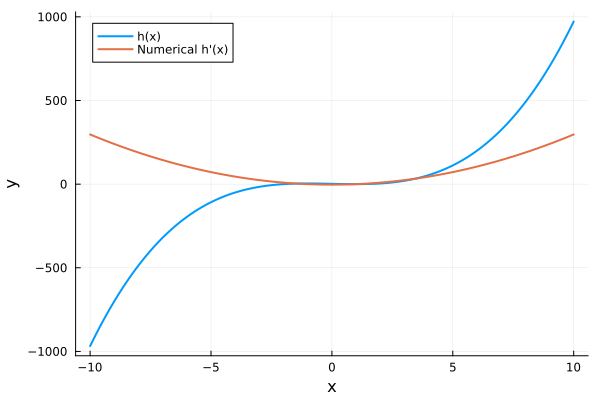

In [2]:
using Plots

x_vals = -10:0.1:10  # x-verdier
h_vals = [h(x) for x in x_vals]  # h(x)-verdier
h_prime_vals = [numerical_derivative(h, x) for x in x_vals]  # h'(x)-verdier

plot(x_vals, h_vals, label="h(x)", xlabel="x", ylabel="y", linewidth=2)
plot!(x_vals, h_prime_vals, label="Numerical h'(x)", linewidth=2)

## Del 2: Rekker

Rekker er en måte å representere funksjoner og løse ulike typer matematiske problemer. I denne delen skal vi se på Taylor-rekker og hvordan vi kan beregne dem manuelt i Julia.

### Taylor-rekker


La oss si du har en funksjon, og den funksjonen er litt av en vrien nøtt. Du kan kanskje ikke engang si hva den er i en eksakt formel. Men du er veldig nysgjerrig på hvordan denne funksjonen oppfører seg rundt et spesifikt punkt, kall det $x = a$.

Du vet at vi kan finne hvordan funksjonen endrer seg—den deriverte. Men hva hvis jeg fortalte deg at vi kan gå lenger? Vi kan finne en måte å beskrive funksjonen ved å bygge den opp rundt dette punktet $a$, bit for bit, som et slags matematisk Legotårn.

Hver "Legobit" er en derivert av funksjonen evaluert i det punktet $a$. Og vi "stokker" disse sammen for å lage en "nærme nok" versjon av funksjonen. Så for hver nye "Legobit", får vi en bedre og bedre tilnærming av funksjonen rundt det punktet.

Så, her kommer Taylor-formelen inn:

$$
f(x) \approx f(a) + f'(a) \cdot (x - a) + \frac{f''(a)}{2!} \cdot (x - a)^2 + \frac{f'''(a)}{3!} \cdot (x - a)^3 + \cdots
$$

Ser du hva som skjer her? Først tar vi funksjonsverdien ved $a$, som er $f(a)$ Deretter legger vi til den første deriverte, som forteller oss "hastigheten" av funksjonsendringen ved $a$. Så legger vi til den andre deriverte, som gir oss "akselerasjonen" i funksjonsendringen, og så videre. Hvet ledd gir oss mer innsikt i hvordan funksjonen oppfører seg rundt punktet $a$. 

Og disse "!" symbolene? Det er fakultet, noe som hjelper oss å "dempe" de høyere ordens termene. Det er som å si, "Ok, ro ned nå, du er viktig, men ikke *så* viktig."


https://www.youtube.com/watch?v=3d6DsjIBzJ4

En Taylor-rekke for en funksjon  $f(x)$ omkring $x = a$ er gitt ved:

$f(x) \approx f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x - a)^2 + \ldots$

La oss prøve å beregne Taylor-rekken for  $e^x$ omkring $x=0$.

In [3]:
# Definerer funksjonen og dens derivater opp til 4. orden
f(x) = exp(x)

f_0 = f(0)
f_1 = numerical_derivative(f, 0)
f_2 = numerical_derivative(x -> numerical_derivative(f, x), 0)
f_3 = numerical_derivative(x -> numerical_derivative(x -> numerical_derivative(f, x), x), 0)
f_4 = numerical_derivative(x -> numerical_derivative(x -> numerical_derivative(x -> numerical_derivative(f, x), x), x), 0)

# Taylor-rekken opp til 4. orden
taylor_exp(x) = f_0 + f_1 * x + f_2 * x^2 / factorial(2) + f_3 * x^3 / factorial(3) + f_4 * x^4 / factorial(4)

# Test
println(taylor_exp(1))  # Dette skal være nær e

118.31823450034672


### Plotting av funksjon og Taylor-rekke

La oss plotte funksjonen $e^x$ og dens Taylor-rekke for å visualisere hvor godt de stemmer overens.

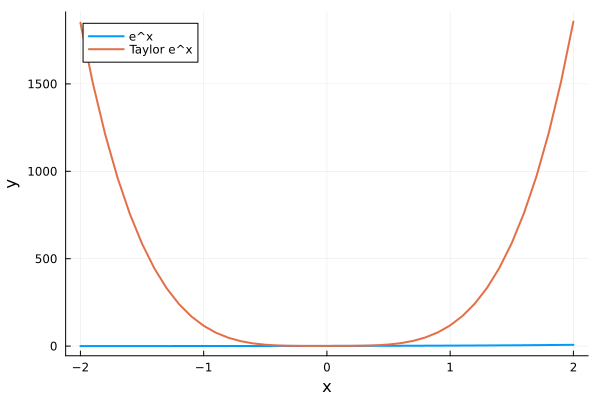

In [4]:
# Plotting

x_vals = -2:0.1:2  # x-verdier
f_vals = [f(x) for x in x_vals]  # f(x)-verdier
taylor_vals = [taylor_exp(x) for x in x_vals]  # Taylor-rekkeverdier

plot(x_vals, f_vals, label="e^x", xlabel="x", ylabel="y", linewidth=2)
plot!(x_vals, taylor_vals, label="Taylor e^x", linewidth=2)

Og der har du det! I denne forelesningen har vi lært hvordan vi kan bruke Julia for numerisk derivasjon og for å arbeide med rekker. Vi har også forstått grunnleggende konsepter som sentral differanse-metoden og Taylor-rekker. Håper dette var lærerikt!